In [1]:
import pandas
import pandas as pd
import numpy as np

data = pd.read_csv("data_superstar_v1_0.csv", delimiter=",")
data['date'] = pd.to_datetime(data['release_date'])
data.sort_values(by="date", inplace=True)

split_day = data["date"].iloc[-1] - pd.DateOffset(years=1)
data_train = data[(data["date"] < split_day)].copy()

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357166 entries, 0 to 357165
Data columns (total 67 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   song_id                 357166 non-null  object        
 1   song_name               357166 non-null  object        
 2   song_popularity         357166 non-null  float64       
 3   explicit                357166 non-null  bool          
 4   song_type               357166 non-null  object        
 5   track_number            357166 non-null  float64       
 6   num_artists             357166 non-null  float64       
 7   num_available_markets   357166 non-null  float64       
 8   release_date            357166 non-null  object        
 9   duration_ms             357166 non-null  float64       
 10  key                     357166 non-null  float64       
 11  mode                    357166 non-null  float64       
 12  time_signature          357166 non-

In [3]:
data.describe()

,song_popularity,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
count,357166.000000,357166.000000,357166.000000,357166.000000,3.571660e+05,357166.000000,357166.000000,357166.000000,357166.000000,357166.000000,...,357166.000000,357166.000000,357166.000000,357166.000000,357166.000000,357166.000000,357166.000000,357166.000000,357166.000000,357166
mean,7.820887,9.334024,1.098002,74.073156,2.256170e+05,5.194947,0.681564,3.911079,0.331654,0.597134,...,0.990841,0.930989,0.991505,0.004383,0.000616,0.258572,0.039483,0.088480,0.010401,2016-07-17 20:54:29.982025216
min,0.000000,1.000000,1.000000,0.000000,1.731000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013-08-26 00:00:00
25%,0.000000,3.000000,1.000000,79.000000,1.820378e+05,2.000000,0.000000,4.000000,0.022800,0.503000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014-12-02 00:00:00
50%,0.000000,8.000000,1.000000,79.000000,2.162615e+05,5.000000,1.000000,4.000000,0.201000,0.612000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016-06-20 00:00:00
75%,9.000000,13.000000,1.000000,79.000000,2.540198e+05,8.000000,1.000000,4.000000,0.623000,0.713000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018-04-13 00:00:00
max,100.000000,92.000000,2.000000,79.000000,6.032273e+06,11.000000,1.000000,5.000000,0.996000,0.992000,...,1.000000,1.000000,1.000000,1.000000,1.000000,51.000000,54.000000,1.000000,1.000000,2019-08-26 00:00:00
std,14.181686,7.852537,0.297318,17.465880,8.977263e+04,3.538828,0.464141,0.400520,0.336680,0.162641,...,0.090436,0.227976,0.084453,0.026276,0.010458,1.457380,0.652624,0.283992,0.101455,NaN


In [4]:
data

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
0,3rTIDlmlGskGnRRqmRtvYn,Lone Stranger,0.0,False,Solo,19.0,1.0,74.0,2013-08-26,163255.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,2013-08-26
64,7fq0d4gJ0MizFcdK7zhddn,Goodbye Lovers and Friends,33.0,False,Solo,10.0,1.0,77.0,2013-08-26,195707.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,2013-08-26
63,6NlE71TbUglmKQVLhE1H8R,Evil Eye,52.0,True,Solo,2.0,1.0,77.0,2013-08-26,167253.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,2013-08-26
62,7mexukWpLrCVwAztkM8kQl,Stand On the Horizon,46.0,False,Solo,4.0,1.0,77.0,2013-08-26,263120.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,2013-08-26
61,6hADH7b57N5666cGv624vg,Right Action,44.0,False,Solo,1.0,1.0,77.0,2013-08-26,182280.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,2013-08-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357140,1EeuFwQ7RhTNlPg69LGUxM,All the Kids on the Street,5.0,False,Solo,6.0,1.0,79.0,2019-08-23,192401.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,2019-08-23
357139,2O9CikWfjkYAgGCBws5Pl4,Baby I'll Give It to You,1.0,False,Solo,25.0,1.0,76.0,2019-08-23,194907.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,2019-08-23
357164,2CZ46u5NGXQFXke3PMCuAK,Today I Started Loving You Again,3.0,False,Solo,15.0,1.0,78.0,2019-08-23,172147.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,2019-08-23
357151,6zhg8TnVKi90ITDzFKwPr0,Swingtown - Alternate Version,26.0,False,Solo,5.0,1.0,79.0,2019-08-23,205707.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,2019-08-23


In [5]:
import matplotlib.pyplot as plt

superstar_columns = [col for col in data.columns if 'superstar' in col]
data_superstar = data[superstar_columns]

# Number of 'superstar' columns
num_superstar_columns = len(data_superstar.columns)

# Create subplots
fig, axes = plt.subplots(nrows=num_superstar_columns, ncols=1, figsize=(8, 4*num_superstar_columns))

# Plot bar plots for each 'superstar' column in subplots
for i, column in enumerate(data_superstar.columns):
    ax = axes[i] if num_superstar_columns > 1 else axes
    value_counts = data_superstar[column].value_counts().sort_index()
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of Occurrences')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000028AB6D89E50> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000028ACF82FCA0> (for post_execute):


KeyboardInterrupt: 

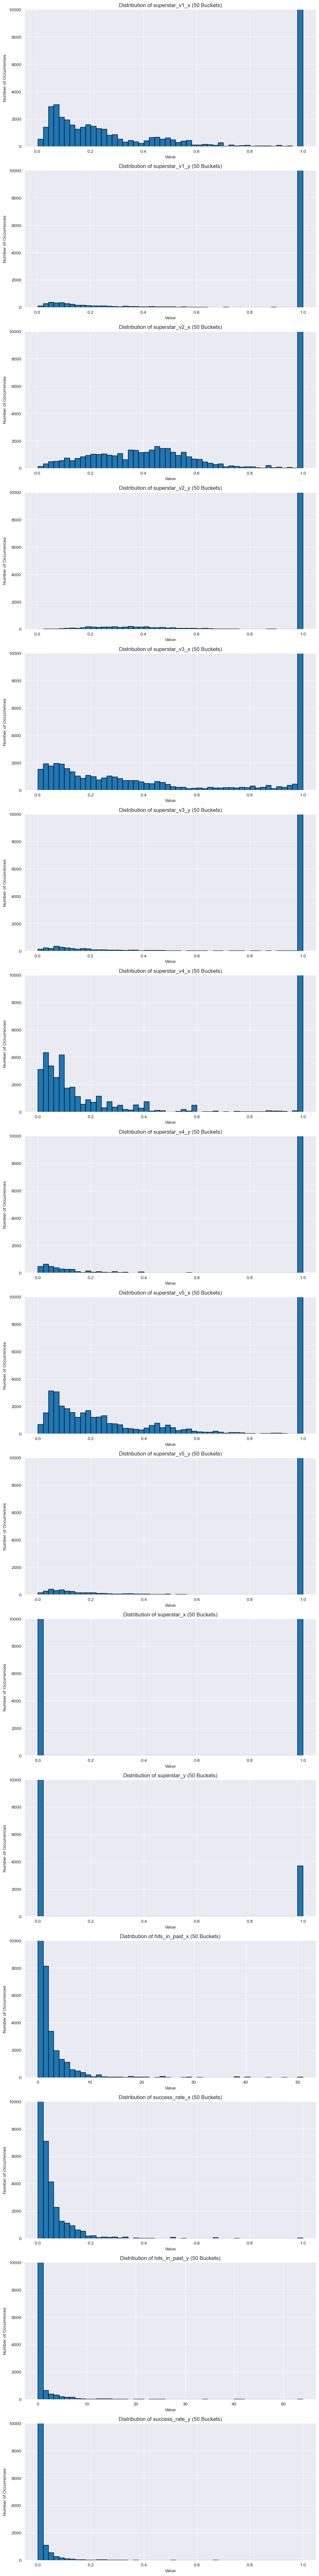

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
# Filter the DataFrame to include only the 'superstar' columns
superstar_columns = [col for col in data.columns if 'superstar' in col]
superstar_columns.extend(["hits_in_past_x", "success_rate_x", "hits_in_past_y", "success_rate_y"])
data_superstar = data[superstar_columns]

# Number of 'superstar' columns
num_superstar_columns = len(data_superstar.columns)

# Create subplots
fig, axes = plt.subplots(nrows=num_superstar_columns, ncols=1, figsize=(10, 5*num_superstar_columns))

# Plot bar plots for each 'superstar' column in subplots
for i, column in enumerate(data_superstar.columns):
    ax = axes[i] if num_superstar_columns > 1 else axes
    # Calculate value counts in 50 bins
    counts, bins = np.histogram(data_superstar[column].dropna(), bins=50)
    # Calculate the center of each bin
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Plotting
    ax.bar(bin_centers, counts, width=bins[1]-bins[0], edgecolor='black')
    ax.set_title(f'Distribution of {column} (50 Buckets)')
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of Occurrences')
    ax.set_ylim(0, 10000)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


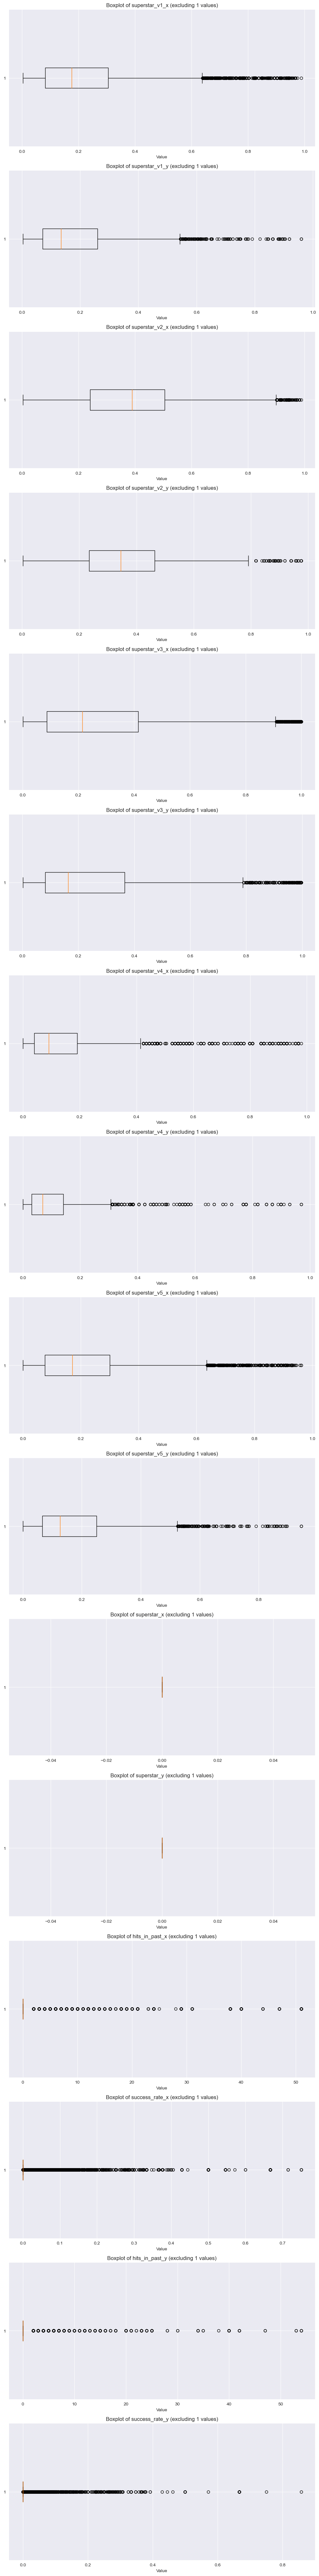

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Filter the DataFrame to include only the 'superstar' and other selected columns
superstar_columns = [col for col in data.columns if 'superstar' in col]
superstar_columns.extend(["hits_in_past_x", "success_rate_x", "hits_in_past_y", "success_rate_y"])
data_superstar = data[superstar_columns]

# Number of columns to plot
num_superstar_columns = len(data_superstar.columns)

# Create subplots
fig, axes = plt.subplots(nrows=num_superstar_columns, ncols=1, figsize=(10, 5*num_superstar_columns))

# Plot boxplots for each column in subplots
for i, column in enumerate(data_superstar.columns):
    ax = axes[i] if num_superstar_columns > 1 else axes
    # Filter out the rows where the value is 1
    filtered_data = data_superstar[column][data_superstar[column] != 1].dropna()
    ax.boxplot(filtered_data, vert=False)
    ax.set_title(f'Boxplot of {column} (excluding 1 values)')
    ax.set_xlabel('Value')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

therefore maybe use superstar v2 and 3 only

In [ ]:
import matplotlib.pyplot as plt

superstar_hits = data[(data['superstar_x'] == 1)]['hit'].sum()
non_superstar_hits = data[data['superstar_x'] == 0]['hit'].sum()

# Prepare data for the bar chart
to_plot = [superstar_hits, non_superstar_hits]
categories = ['Superstar', 'Non-Superstar']

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(categories, to_plot, color=['gold', 'lightskyblue'])
plt.xlabel('Superstar Status')
plt.ylabel('Number of Hits')
plt.title('Hits by Superstar Status')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Filter data for superstars and non-superstars
superstars = data[data['superstar_x'] == 1]
non_superstars = data[data['superstar_x'] == 0]

# Count hits and non-hits
superstar_hits = superstars['hit'].sum()
superstar_non_hits = len(superstars) - superstar_hits  # Assuming all rows have a value in 'hit'

non_superstar_hits = non_superstars['hit'].sum()
non_superstar_non_hits = len(non_superstars) - non_superstar_hits

# Prepare data for the bar chart
data = [superstar_hits, superstar_non_hits, non_superstar_hits, non_superstar_non_hits]
categories = ['Superstar Hits', 'Superstar Non-Hits', 'Non-Superstar Hits', 'Non-Superstar Non-Hits']

# Create the bar chart with adjusted width for better visibility
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.bar(categories, data, color=['gold', 'lightcoral', 'lightskyblue', 'lightblue'], width=0.4)
plt.xlabel('Superstar Status & Hits')
plt.ylabel('Number of Songs')
plt.title('Hits and Non-Hits by Superstar Status')
plt.xticks(rotation=15)  # Rotate x-axis labels slightly for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines

# Display the chart
plt.tight_layout()
plt.show()


In [ ]:
# Filter data for superstars and non-superstars
#superstars = data[data['superstar_x'] == 1]
#non_superstars = data[data['superstar_x'] == 0]

#print(superstars)

# Count hits and non-hits
superstar_hits = superstars['hit'].sum()
superstar_non_hits = len(superstars) - superstar_hits  # Assuming all rows have a value in 'hit'

non_superstar_hits = non_superstars['hit'].sum()
non_superstar_non_hits = len(non_superstars) - non_superstar_hits

print(superstar_hits)

# Calculate total songs for each category
total_superstar_songs = len(superstars)
total_non_star_songs = len(non_superstars)

# Prepare data for the pie chart (percentages)
superstar_hit_pct = (superstar_hits / total_superstar_songs) * 100
superstar_non_hit_pct = (superstar_non_hits / total_superstar_songs) * 100
non_star_hit_pct = (non_superstar_hits / total_non_star_songs) * 100
non_star_non_hit_pct = (non_superstar_non_hits / total_non_star_songs) * 100

print(superstar_hit_pct)

# Combine data into lists for the pie chart
labels = ['Superstar Hits', 'Superstar Non-Hits', 'Non-Superstar Hits', 'Non-Superstar Non-Hits']
sizes = [superstar_hit_pct, superstar_non_hit_pct, non_star_hit_pct, non_star_non_hit_pct]

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as desired
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)  # Customize options
plt.title('Distribution of Hits and Non-Hits by Superstar Status (Percentages)')
plt.axis('equal')  # Equal aspect ratio for a circular pie chart

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
# Count hits and non-hits
superstar_hits = superstars['hit'].sum()
superstar_non_hits = len(superstars) - superstar_hits  # Assuming all rows have a value in 'hit'

non_superstar_hits = non_superstars['hit'].sum()
non_superstar_non_hits = len(non_superstars) - non_superstar_hits

# Prepare data for superstar pie chart
superstar_labels = ['Superstar Hits', 'Superstar Non-Hits']
superstar_sizes = [superstar_hits, superstar_non_hits]

# Prepare data for non-superstar pie chart
non_star_labels = ['Non-Superstar Hits', 'Non-Superstar Non-Hits']
non_star_sizes = [non_superstar_hits, non_superstar_non_hits]

startangle = 140

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figure size as desired

# Create the pie chart for superstars
ax1.pie(superstar_sizes, labels=superstar_labels, autopct="%1.1f%%", startangle=140)
ax1.set_title('Superstar Hits Distribution (Percentages)')
ax1.axis('equal')  # Equal aspect ratio for a circular pie chart

# Create the pie chart for non-superstars
ax2.pie(non_star_sizes, labels=non_star_labels, autopct="%1.1f%%", startangle=140)
ax2.set_title('Non-Superstar Hits Distribution (Percentages)')
ax2.axis('equal')  # Equal aspect ratio for a circular pie chart



# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
columns = ["hit", 'explicit', 'num_available_markets',
            'instrumentalness', 'loudness', 'years_on_charts', "superstar_x"] 
            #"hits_in_past_x", "success_rate_x", "superstar_x", "superstar_v5_x","superstar_v4_x","superstar_v3_x","superstar_v2_x","superstar_v1_x"] 
             #"hits_in_past_y", "success_rate_y", "superstar_y", "superstar_v5_y","superstar_v4_y","superstar_v3_y","superstar_v2_y","superstar_v1_y"]#"pagerank_x", "pagerank_y", "success_rate_x", "success_rate_y", "hits_in_past_x", "hits_in_past_y"]#, "superstar_v5_x","superstar_v4_x","superstar_v3_x","superstar_v2_x","superstar_v1_x", "superstar_v5_y"]
#columns = ["hit", "pagerank_x", "pagerank_y"]#"degree_x", "weighted degree_x", "eccentricity_x", "closnesscentrality_x", "clustering_x", "betweenesscentrality_x", "eigencentrality_x","degree_y", "weighted degree_y", "eccentricity_y", "closnesscentrality_y", "clustering_y", "betweenesscentrality_y", "eigencentrality_y"]

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `data` is your DataFrame and `columns` is the list of columns you want to consider
correlation_matrix = data_train[columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix (Lower Left Half)')
plt.show()

In [ ]:
correlation_matrix = data_train[columns].corr(method="spearman")

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix (Lower Left Half)')
plt.show()

why is pagerank_x negatively correlated???
maybe because less successfullartists with hit artist coop?

In [ ]:
df_one_hot = pd.get_dummies(data_train, columns=['Cluster_x', "Cluster_y"], drop_first=True)
df_one_hot

In [ ]:
one_hot_columns = [col for col in df_one_hot.columns if col not in data_train.columns]

In [ ]:
#columns.extend(one_hot_columns)
columns = ["hit"]
columns.extend(one_hot_columns)

In [ ]:
# Assume `data` is your DataFrame and `columns` is the list of columns you want to consider
correlation_matrix = df_one_hot[columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix (Lower Left Half)')
plt.show()

In [ ]:
correlation_matrix = df_one_hot[columns].corr(method="spearman")

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix (Lower Left Half)')
plt.show()

plot amount hit songs and successrate of artist by clusters and pagerank as well as superstar var.

## explain on Example of Taylor swift

In [ ]:
swift_id = '06HL4z0CvFAxyc27GXpf02'

In [ ]:
swift_songs = data_train[(data_train["artist1_id"] == swift_id) | (data_train["artist2_id"] == swift_id)]
swift_songs

Taylor Swift's is part of Cluster 1 

In [ ]:
swift_songs["num_artists"].value_counts()

In [ ]:
swift_songs["hit"].value_counts()

alan walker

In [ ]:
walker_id = '7vk5e3vY1uw9plTHJAMwjN'
walker_songs = data_train[(data_train["artist1_id"] == walker_id) | (data_train["artist2_id"] == walker_id)]
walker_songs

In [ ]:
walker_songs["num_artists"].value_counts()

In [ ]:
walker_songs["hit"].value_counts()

get one of the most successfull artists:


In [ ]:
data_train.sort_values(by="hits_in_past_x", ascending=False)

since gleecast is not really one artist we chose to use drake instead:

In [ ]:
drake_id = '3TVXtAsR1Inumwj472S9r4'
drake_songs = data_train[(data_train["artist1_id"] == drake_id) | (data_train["artist2_id"] == drake_id)]
drake_songs

In [ ]:
drake_songs["num_artists"].value_counts()

almost half of the songs were collaborations

In [ ]:
drake_songs["hit"].value_counts()

In [ ]:
drake_hits = drake_songs[drake_songs["hit"] == 1.0]
drake_hits

In [ ]:
drake_hits["num_artists"].value_counts()

of these x songs y are collabs

In [ ]:
drake_collab = drake_songs[drake_songs["num_artists"] >= 2.0]
drake_collab

In [ ]:
drake_collab["hit"].value_counts()

% of hit songs are collab..

get better Artist find those with biggest pagerank

# Shap Analysis

In [1]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

data = pd.read_csv("data_superstar_v1_0.csv", delimiter=",")
data['date'] = pd.to_datetime(data['release_date'])
data.sort_values(by="date", inplace=True)


# Drop columns not in the list
data["explicit"] = data["explicit"].astype(int)


def find_min_max(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number'])

    # Find max and min values for each numeric column
    min_max_values = {}
    for col in numeric_cols.columns:
        min_value = df[col].min()
        max_value = df[col].max()
        min_max_values[col] = {'min': min_value, 'max': max_value}

    return min_max_values


min_max_val = find_min_max(data)

y = data["hit"]
X = data.drop(columns=["hit"])


def preprocess(df, min_max_values, exclude_cols=None):
    missing_numerical = df.select_dtypes(include=['number']).isnull().sum()
    # Fill missing values with mean for each numeric attribute
    imputer = SimpleImputer(strategy='mean')
    df_filled = df.copy()
    for col in missing_numerical.index:
        if missing_numerical[col] > 0:
            df_filled[col] = imputer.fit_transform(df[[col]])

    # Normalize numerical features into [0, 1] range with MinMaxScaler
    if exclude_cols:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns.difference(exclude_cols)
    else:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns

    # print("numerical columns:", numerical_cols)

    for column_name in numerical_cols:
        df_filled[column_name] = (df_filled[column_name] - min_max_values[column_name]["min"]) / (
                min_max_values[column_name]["max"] - min_max_values[column_name]["min"])

    df_normalized = pd.DataFrame(df_filled, columns=numerical_cols)

    # One-hot encode categorical features
    encoder = OneHotEncoder(handle_unknown='ignore')
    if exclude_cols:
        categorical_cols = df.select_dtypes(include=['string']).columns.difference(exclude_cols)
    else:
        categorical_cols = df.select_dtypes(include=['string']).columns
    df_encoded = encoder.fit_transform(df[categorical_cols])

    print(categorical_cols)

    # Convert the sparse matrix to dense array
    df_encoded_dense = df_encoded.toarray()

    # Concatenate numerical and encoded categorical features
    df_processed = np.hstack([df_normalized.values, df_encoded_dense])

    return df_processed

# split_day = X["date"].iloc[-1] - pd.DateOffset(years=1)
# X_train = X[(X["date"] < split_day)].copy()
# X_test = X[(X["date"] >= split_day)].copy()
# 
# sep_index = X_train.shape[0]
# y_train = y.iloc[:sep_index].copy()
# y_test = y.iloc[sep_index:].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [3]:
X_train.drop(columns=["song_popularity"], inplace=True)
X_test.drop(columns=["song_popularity"], inplace=True)

In [4]:
X_train = pd.get_dummies(X_train, columns=["Cluster_x", "Cluster_y"], drop_first=True) #, "profile_x", "profile_y"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Cluster_x", "Cluster_y"], drop_first=True) #, "profile_x", "profile_y"], drop_first=True)

In [5]:
added_cols = ['Cluster_x_0.0', 'Cluster_x_1.0', 'Cluster_x_2.0', 'Cluster_x_3.0',
              'Cluster_x_4.0', 'Cluster_x_5.0', 'Cluster_y_0.0', 'Cluster_y_1.0',
              'Cluster_y_3.0', 'Cluster_y_4.0', 'Cluster_y_5.0',
              'profile_x_1A 2A 3A 4B', 'profile_x_1A 2A 3B 4A',
              'profile_x_1A 2B 3A 4A', 'profile_x_1A 2B 3A 4B',
              'profile_x_1A 2B 3B 4A', 'profile_x_1B 2A 3A 4A', 'profile_x_No Match',
              'profile_y_1A 2A 3A 4B', 'profile_y_1A 2A 3B 4A',
              'profile_y_1A 2B 3A 4A', 'profile_y_1A 2B 3A 4B',
              'profile_y_1A 2B 3B 4A', 'profile_y_1B 2A 3A 4A', 'profile_y_No Match']

for i in added_cols:
    min_max_val[i] = {'min': 0.0, 'max': 1.0}

In [6]:
X_train[X_train.select_dtypes(include=[bool]).columns] = X_train.select_dtypes(include=[bool]).astype(int)
X_test[X_test.select_dtypes(include=[bool]).columns] = X_test.select_dtypes(include=[bool]).astype(int)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683270 entries, 0 to 683433
Data columns (total 74 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   song_id                 683270 non-null  object        
 1   song_name               683270 non-null  object        
 2   explicit                683270 non-null  int32         
 3   song_type               683270 non-null  object        
 4   track_number            683270 non-null  float64       
 5   num_artists             683270 non-null  float64       
 6   num_available_markets   683270 non-null  float64       
 7   release_date            683270 non-null  object        
 8   duration_ms             683270 non-null  float64       
 9   key                     683270 non-null  float64       
 10  mode                    683270 non-null  float64       
 11  time_signature          683270 non-null  float64       
 12  acousticness            683270 non-

In [8]:
X_train = X_train.select_dtypes(exclude=['object']) #include onehot enc for some string values /different encod
X_train.drop(columns="date", inplace=True)
X_test = X_test.select_dtypes(exclude=['object']) #include onehot enc for some string values /different encod
X_test.drop(columns="date", inplace=True)

In [9]:
feature_names = X_train.columns
X_train = preprocess(X_train, min_max_val)
X_test = preprocess(X_test, min_max_val)
feature_names

KeyError: 'Cluster_y_2.0'

In [10]:
len(feature_names)

63

create model

In [11]:
from torch import nn
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class MLPClassifier(nn.Module):
    def __init__(self, input_shape):
        super(MLPClassifier, self).__init__()
        self.input_shape = input_shape
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape[1], 128),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(128, 256),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(256, 512),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(64, 1)
        ).to(device)

    def forward(self, x):
        logits = self.layers(x)
        return torch.sigmoid(logits)


def load_model(model, path):
    checkpoint = torch.load(path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"Model {path} is loaded from epoch {checkpoint['epoch']} , loss {checkpoint['loss']}")
    return model

In [12]:
type(y_train), type(y_test)

(pandas.core.series.Series, pandas.core.series.Series)

In [13]:
from torch.utils.data import TensorDataset, DataLoader

# convert to Pytorch tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)
print("######CONVERSION TO TENSOR######")

# Move the data to the GPU if available
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# define model
print(X_train.size())
model = MLPClassifier(X_train.size()).to(device)

# Define loss function and optimizer (same as TensorFlow example)
loss_fn = nn.BCELoss()  # alternative #BCELoss(weights=weights)#nn.MSELoss()
loss_fn_mae = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters())#, weight_decay=0.01) # l2 reg
#l1_penalty = torch.nn.L1Loss(size_average=False)

# Create DataLoader with oversampled data
dataset_train = TensorDataset(X_train, y_train)
trainloader = DataLoader(dataset_train, batch_size=256, shuffle=True)#, num_workers=2)#, num_workers=2, pin_memory=True) #last two are new look at later
dataset_test = TensorDataset(X_test, y_test)
val_loader = DataLoader(dataset_test, batch_size=256, shuffle=False)#, num_workers=2)

# Training loop
train_losses = []
val_losses = []
val_accs = []
val_prec = []
epochs = 10
best_val_loss = 1e8
best_val_acc = 0
best_precision = 0
best_prec_acc = 0.0
version = "v3_try_reg"

#lambda1 = 0.0  # L1 penalty strength
# nweights = 0
# for name,weights in model.named_parameters():
#     if 'bias' not in name:
#         nweights = nweights + weights.numel()
# print(f'Total number of weights in the model = {nweights}')

for epoch in range(epochs):  # Adjust epochs as needed
    epoch_train_loss = 0.0
    epoch_val_loss = 0.0

    # Initialize counts for each class

    # Training phase
    model.train()  # Set model to training mode
    for X_batch, y_batch in trainloader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        # Forward pass
        y_pred = model(X_batch)
        # print("y_batch: ", y_batch)
        # print("y_pred: ", y_pred)
        #print(y_batch.shape)
        y_batch = y_batch.reshape(-1, 1)
        #print(y_batch.shape)
        loss = loss_fn(y_pred, y_batch)
        #l1_norm = 0
        #for param in model.parameters():
        #    l1_norm += l1_penalty(param)
        #l2_norm = sum(torch.square(param) for param in model.parameters())
        #l1_norm = sum(param.abs().sum() for param in model.parameters())
        #l2_norm = sum(param.pow(2).sum() for param in model.parameters())        
        #l1_penalty_var = lambda1 * l1_norm #+ lambda2 * l2_norm
        #total_loss = loss + l1_penalty_var
        # L1_term = torch.tensor(0., requires_grad=True)
        # for name, weights in model.named_parameters():
        #     if 'bias' not in name:
        #         weights_sum = torch.sum(torch.abs(weights))
        #         L1_term = L1_term + weights_sum
        # L1_term = L1_term / nweights

        # Regularize loss using L1 regularization
        total_loss = loss #+ L1_term * lambda1   #? -

        # Backward pass and optimize
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        epoch_train_loss += total_loss.item()
    # Calculate average epoch training loss
    avg_epoch_train_loss = epoch_train_loss / len(trainloader)
    train_losses.append(avg_epoch_train_loss)

    # Validation phase
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        correct, total = 0.0, 0.0
        tp, fp =  0.0, 0.0
        loss_step = []
        for data in val_loader:
            inp_data, labels = data
            inp_data = inp_data.to(device)
            labels = labels.to(device)
            outputs = model(inp_data)
            labels = labels.reshape(-1, 1)
            val_loss = loss_fn(outputs, labels)
            predicted = outputs.round()
            total += labels.size(0)
            correct += (predicted == labels).sum()
            loss_step.append(val_loss.item())
            #print(labels.shape)
            #print(predicted.shape)
            tp  += ((labels == 1) & (1 == predicted)).sum().item()
            fp += ((labels == 0) & (1 == predicted)).sum().item()
        # dont forget to take the means here
        epoch_val_acc = (correct / total).cpu().numpy()
        epoch_val_loss = torch.tensor(loss_step).mean().numpy()
        #print('TP:', tp, 'FP:', fp)
        epoch_val_prec = tp / (tp + fp) if tp + fp > 0 else 0

        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_val_loss,
            }, f'best_torch_{version}_model_min_val_loss.pth')
        if epoch_val_acc > best_val_acc:
            best_val_acc = epoch_val_acc
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_val_loss,
            }, f'best_torch_{version}_model_max_val_acc.pth')
        if epoch_val_prec > best_precision or (epoch_val_prec > best_prec_acc and best_val_acc == epoch_val_acc):
            best_precision = epoch_val_prec
            #if best_prec_acc < epoch_val_acc:
            best_prec_acc = epoch_val_acc
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_val_loss,
                'precision': best_precision,
            }, f"best_torch_{version}_model_max_val_prec.pth")

        val_prec.append(epoch_val_prec)
        val_losses.append(epoch_val_loss)
        val_accs.append(epoch_val_acc)
        print(
            f"Epoch [{epoch + 1}/{epochs}], Training Loss: {avg_epoch_train_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {epoch_val_acc:.4f}, Validation Precision: {epoch_val_prec:.4f}")

print("######TRAINING DONE######")


def load_model(model, path):
    checkpoint = torch.load(path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"Model {path} is loaded from epoch {checkpoint['epoch']} , loss {checkpoint['loss']}")
    return model


print("######LOAD MODEL######")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLPClassifier(X_train.size())
model = load_model(model, f"best_torch_{version}_model_max_val_prec.pth")
model = model.to(device)
model.eval()

######CONVERSION TO TENSOR######
torch.Size([683270, 63])
Epoch [1/10], Training Loss: 0.0257, Validation Loss: 0.0195, Validation Accuracy: 0.9965, Validation Precision: 1.0000
Epoch [2/10], Training Loss: 0.0097, Validation Loss: 0.0112, Validation Accuracy: 0.9983, Validation Precision: 0.9818
Epoch [3/10], Training Loss: 0.0088, Validation Loss: 0.0217, Validation Accuracy: 0.9971, Validation Precision: 1.0000
Epoch [4/10], Training Loss: 0.0076, Validation Loss: 0.0109, Validation Accuracy: 0.9979, Validation Precision: 0.9153
Epoch [5/10], Training Loss: 0.0077, Validation Loss: 0.0134, Validation Accuracy: 0.9973, Validation Precision: 0.8537
Epoch [6/10], Training Loss: 0.0104, Validation Loss: 0.0172, Validation Accuracy: 0.9969, Validation Precision: 0.8192
Epoch [7/10], Training Loss: 0.0071, Validation Loss: 1.1868, Validation Accuracy: 0.6262, Validation Precision: 0.0220
Epoch [8/10], Training Loss: 0.0082, Validation Loss: 0.0116, Validation Accuracy: 0.9983, Validation 

MLPClassifier(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=63, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): ReLU()
    (7): Linear(in_features=512, out_features=256, bias=True)
    (8): ReLU()
    (9): Linear(in_features=256, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=64, bias=True)
    (12): ReLU()
    (13): Linear(in_features=64, out_features=1, bias=True)
  )
)

######LOSS PLOT DONE######
optimal threshold 0.3, with precision 1.0
######CONFUSION MATRIX PLOT DONE######
True Negatives (TN): 225631
False Positives (FP): 0
False Negatives (FN): 796
True Positives (TP): 1330
Precision: 1.0
Recall: 0.625587958607714
F1-Score: 0.7696759259259259
ROC AUC: 0.812793979303857
######ROC-AUC PLOT DONE######
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    225631
         1.0       1.00      0.63      0.77      2126

    accuracy                           1.00    227757
   macro avg       1.00      0.81      0.88    227757
weighted avg       1.00      1.00      1.00    227757
Weighted Accuracy: 0.9872357843665023
Macro F1 Score: 0.8839575449635028


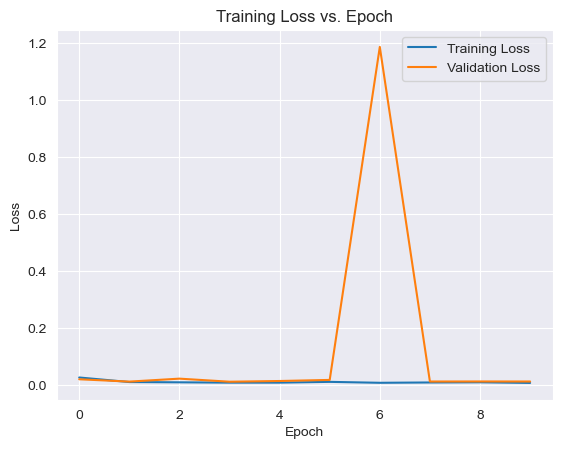

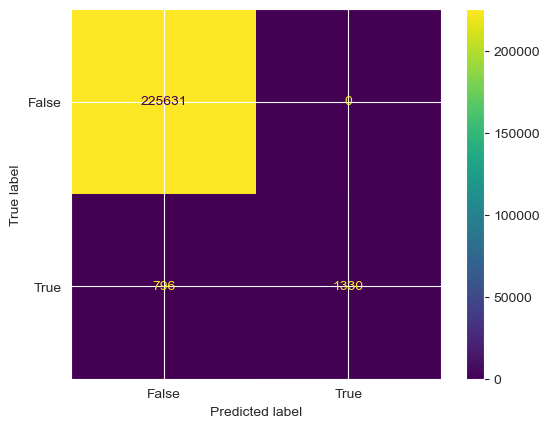

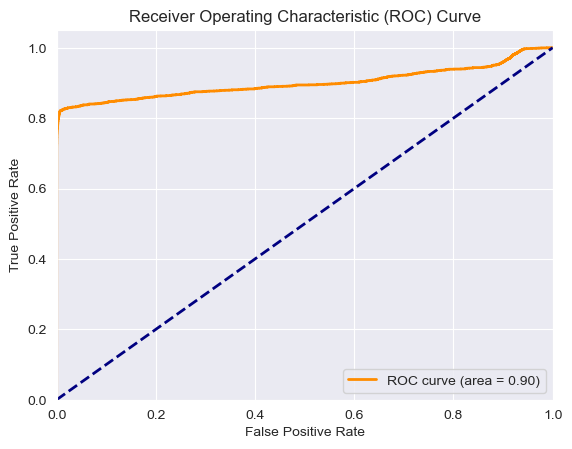

In [14]:
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.legend()
plt.savefig(f"losses_pytorch_{version}.png")
print("######LOSS PLOT DONE######")

# Calculate confusion matrix
output = model(X_test)
# print("output", output)

opt_thres = -1
opt_prec = 0
liste_thresh = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
true_labels = y_test.int().tolist()
# print(output.tolist())
for i in liste_thresh:
    flattened_list = [item for sublist in output.tolist() for item in sublist]
    predictions = list(map(lambda x: int(x >= i), flattened_list))

    precision = metrics.precision_score(true_labels, predictions)

    # Recall
    recall = metrics.recall_score(true_labels, predictions)
    # F1-Score
    f1 = metrics.f1_score(true_labels, predictions)
    # ROC Curve and AUC
    fpr, tpr, thresholds = metrics.roc_curve(true_labels, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    # print("Precision:", precision)
    # print("Recall:", recall)
    # print("F1-Score:", f1)
    # print("ROC AUC:", roc_auc)

    if precision > opt_prec:
        opt_thres = i
        opt_prec = precision
print(f"optimal threshold {opt_thres}, with precision {opt_prec}")

predictions = output.round().int().tolist()  # Converting tensor to list of integers
true_labels = y_test.int().tolist()  # Converting tensor to list of integers

confusion_matrix = metrics.confusion_matrix(true_labels, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()
plt.savefig(f"Confusion_Matrix_pytorch_{version}.png")
print("######CONFUSION MATRIX PLOT DONE######")

# Extract TN, FP, TP values
TN = confusion_matrix[0, 0]  # True Negatives
FP = confusion_matrix[0, 1]  # False Positives
FN = confusion_matrix[1, 0]  # False Negatives
TP = confusion_matrix[1, 1]  # True Positives

# Print the results
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)

# Precision 
precision = metrics.precision_score(true_labels, predictions)
# Recall 
recall = metrics.recall_score(true_labels, predictions)
# F1-Score 
f1 = metrics.f1_score(true_labels, predictions)
# ROC Curve and AUC 
fpr, tpr, thresholds = metrics.roc_curve(true_labels, predictions)
roc_auc = metrics.auc(fpr, tpr)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

# print(output.device)
output_cpu = output.cpu().detach().numpy()

fpr, tpr, thresholds = metrics.roc_curve(y_test.tolist(), output_cpu.tolist())
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig(f"ROC_AUC_pytorch_{version}.png")
print("######ROC-AUC PLOT DONE######")

# Generate a classification report
class_report = classification_report(y_test.tolist(), predictions)
print("Classification Report:\n", class_report)

y_test_cpu = y_test.cpu()
y_test_list = y_test_cpu.tolist()

# Convert predictions to list
predictions_list = list(np.hstack(predictions))

y_test_series = pd.Series(list(np.hstack(y_test_list)))
count_occ = y_test_series.value_counts(normalize=True)

# Calculate the weighted accuracy
weighted_acc = (np.sum((y_test_series == 1) == predictions_list) * count_occ[0] + np.sum(
    (y_test_series == 0) == predictions_list) * count_occ[1]) / len(y_test_list)

print("Weighted Accuracy:", weighted_acc)

macro_f1 = metrics.f1_score(true_labels, predictions, average='macro')

print("Macro F1 Score:", macro_f1)

In [15]:
y_train.shape, y_test.shape

(torch.Size([683270]), torch.Size([227757]))

In [16]:
print("######LOAD MODEL######")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLPClassifier(X_train.size())
model = load_model(model, f"best_torch_{version}_model_max_val_prec.pth")
model = model.to(device)
model.eval()

######LOAD MODEL######
Model best_torch_v3_try_reg_model_max_val_prec.pth is loaded from epoch 1 , loss 0.019474942237138748


MLPClassifier(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=63, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): ReLU()
    (7): Linear(in_features=512, out_features=256, bias=True)
    (8): ReLU()
    (9): Linear(in_features=256, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=64, bias=True)
    (12): ReLU()
    (13): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [17]:
model = model.cpu()
my_model = nn.Sequential(*list(list(model.children())[0].children())[1:])
my_model.eval()
my_model

Sequential(
  (0): Linear(in_features=63, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=256, bias=True)
  (7): ReLU()
  (8): Linear(in_features=256, out_features=128, bias=True)
  (9): ReLU()
  (10): Linear(in_features=128, out_features=64, bias=True)
  (11): ReLU()
  (12): Linear(in_features=64, out_features=1, bias=True)
)

In [18]:
import numpy as np
import pandas as pd

def model_forward(input):
    input2 = torch.tensor(input.values, dtype=torch.float32)
    output = my_model(input2)
    return pd.DataFrame(output.detach().cpu().numpy())

X_train_np = X_train.detach().cpu().numpy()
X_test_np = X_test.detach().cpu().numpy()

X_train_df = pd.DataFrame(X_train_np, columns=feature_names)
X_test_df = pd.DataFrame(X_test_np, columns=feature_names)

In [19]:
background_data_kmeans = shap.kmeans(X_train_df, k=500)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [20]:
background_data_kmeans_np = shap.kmeans(X_train_np, k=500)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [21]:
def model_forward(input):
    input2 = torch.tensor(input, dtype=torch.float32)
    output = my_model(input2)
    return output.detach().cpu().numpy()

In [22]:
explainer = shap.KernelExplainer(model_forward, background_data_kmeans_np)
test_data_sample = shap.sample(X_test_np, 100)
shap_values = explainer.shap_values(test_data_sample)

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
shap_values

[array([[-1.30284532,  0.00908847,  0.01063098, ...,  0.00473372,
          0.00867728,  0.00849605],
        [ 0.07507129, -0.00178328,  0.02484362, ...,  0.00485526,
          0.01156306,  0.00256316],
        [ 0.07584305,  0.02491387,  0.02675537, ...,  0.00755513,
          0.01196565,  0.00307383],
        ...,
        [ 0.08106244,  0.00639881,  0.02248695, ...,  0.00575921,
          0.00948343,  0.00243592],
        [ 0.08153907, -0.01582768,  0.02341311, ...,  0.00591652,
          0.01100998,  0.00307614],
        [ 0.08089525, -0.0035921 ,  0.0248513 , ...,  0.00699163,
          0.00970232,  0.00203559]])]

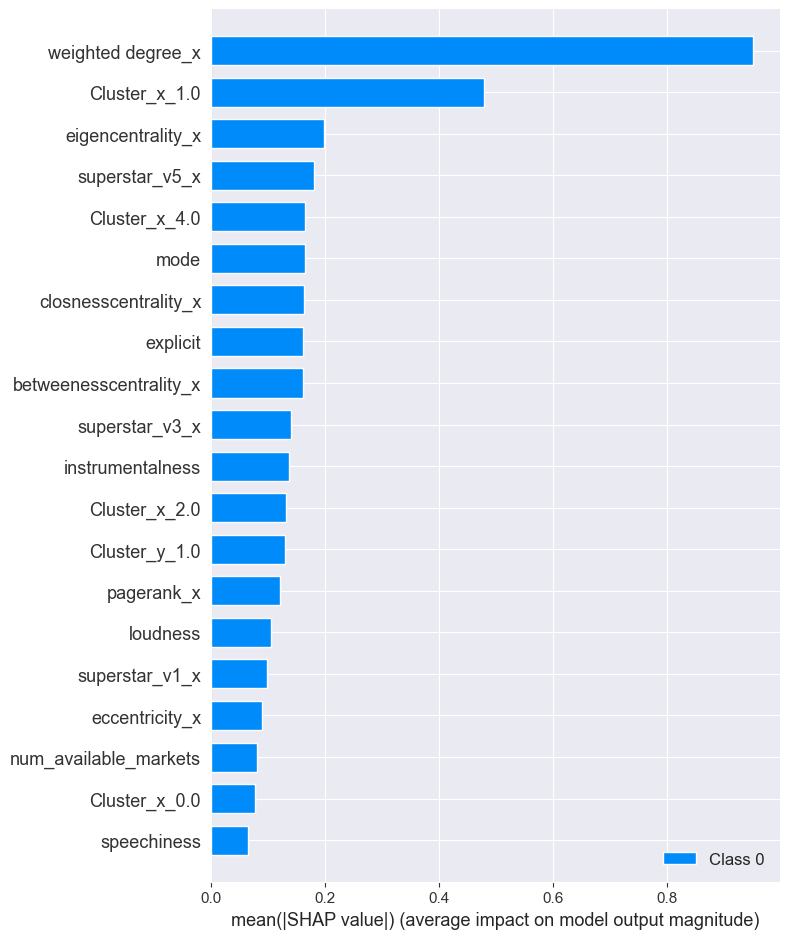

In [24]:
shap.summary_plot(shap_values, X_test_df)


In [25]:
background_data_kmeans_np = shap.kmeans(X_train_np, k=100)
explainer = shap.KernelExplainer(model_forward, background_data_kmeans_np)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [26]:
test_data_sample = shap.sample(X_test_np, 1000)
shap_values = explainer.shap_values(test_data_sample)

  0%|          | 0/1000 [00:00<?, ?it/s]

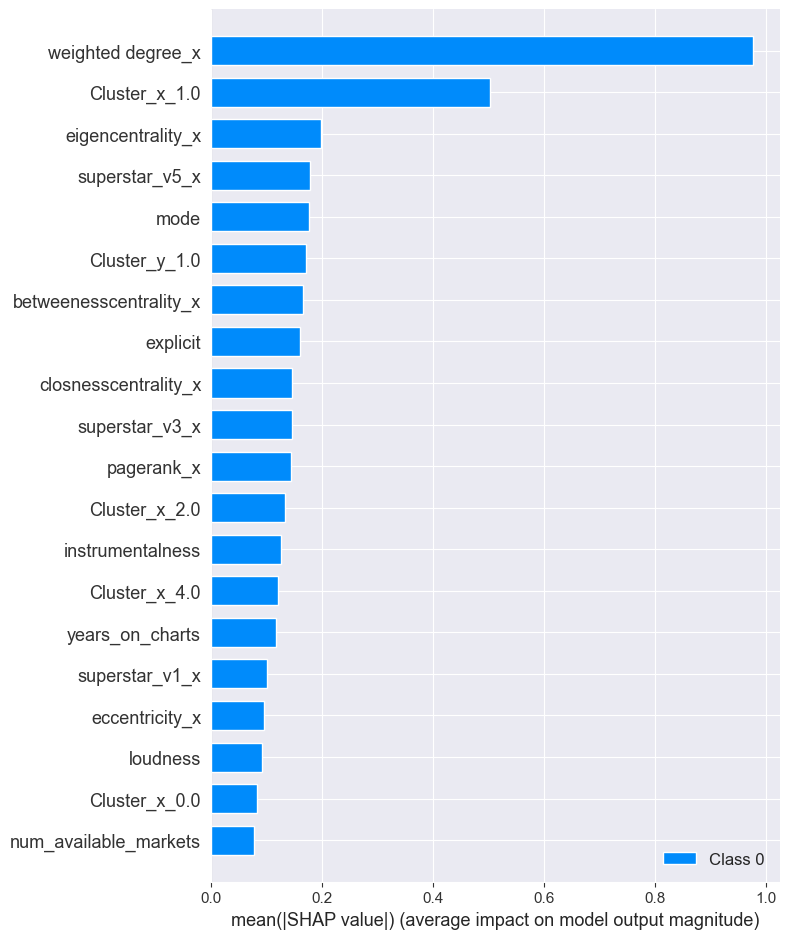

In [27]:
shap.summary_plot(shap_values, X_test_df)

In [28]:
background_data_kmeans_np = shap.kmeans(X_train_np, k=50)
explainer = shap.KernelExplainer(model_forward, background_data_kmeans_np)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [29]:
test_data_sample = shap.sample(X_test_np, 10000)
shap_values = explainer.shap_values(test_data_sample)

  0%|          | 0/1000 [00:00<?, ?it/s]

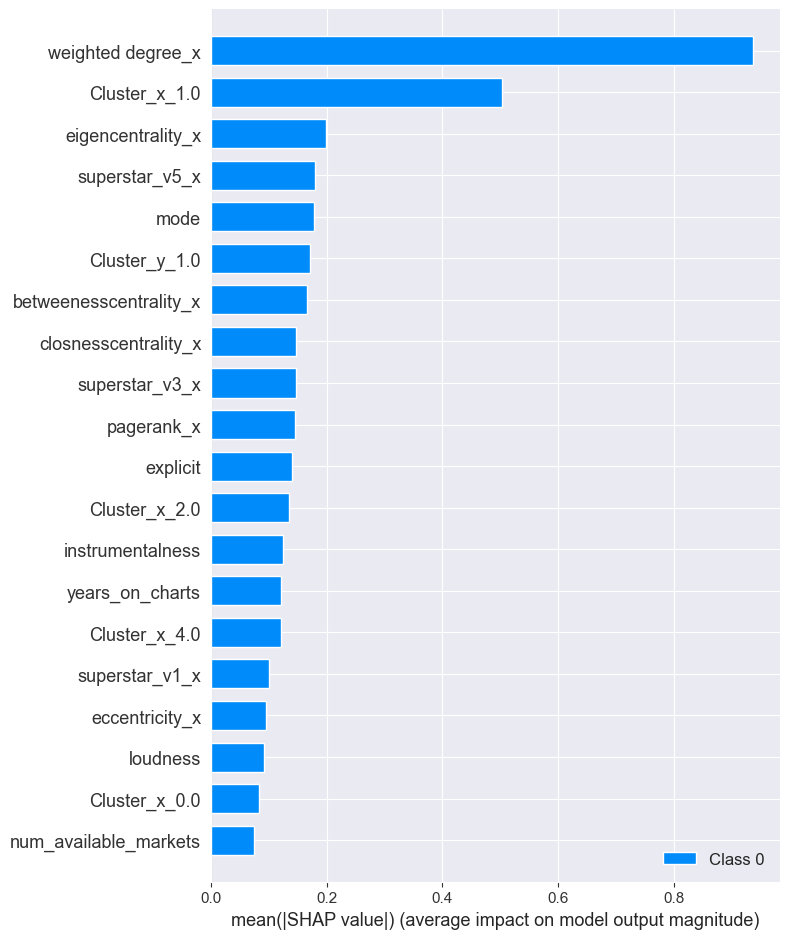

In [30]:
shap.summary_plot(shap_values, X_test_df)

In [31]:
shap_values[0].shape

(1000, 63)

In [32]:
X_test_df.shape

(227757, 63)

In [33]:
len(feature_names)

63

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


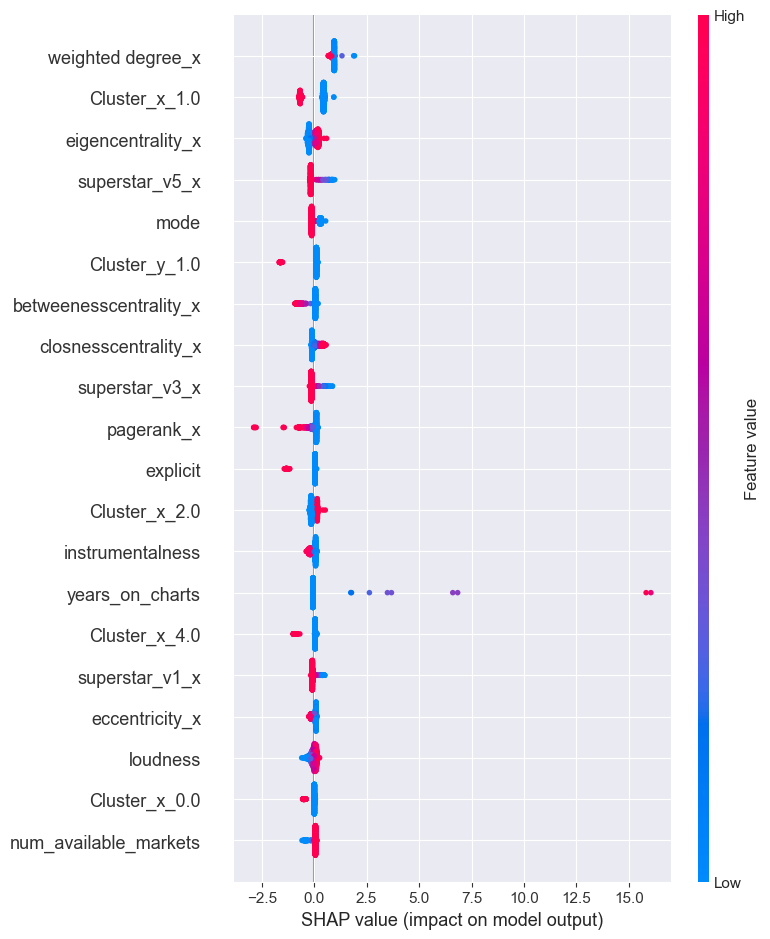

In [34]:
shap.summary_plot(shap_values[0], test_data_sample, feature_names = X_test_df.columns)

In [35]:
X_test_df["Cluster_x"]

KeyError: 'Cluster_x'

just encode cluster kein großer vorteil:
Validation Accuracy: 0.9984 -> 0.9985
print("Macro F1 Score:", macro_f1)
weighted Accuracy: 0.9890669714056618 -> 0.9877571340882394
Macro F1 Score: ? -> 0.9049004048797133

Rec: ? -> 0.68...

war ohne profile und cluster

mit cluster:
w acc: 0.9893...
re 0.847
pre 0.9994
m f1 0.964
mit beidem:

In [11]:
import matplotlib
import pandas as pd
import torch
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("data_superstar_v1_0.csv", delimiter=",", na_values=[''])
data['date'] = pd.to_datetime(data['release_date'])
data.sort_values(by="date", inplace=True)

# List of columns to keep
columns_to_keep = ['explicit', 'track_number', 'num_artists', 'num_available_markets',
                   'duration_ms', 'key', 'mode', 'time_signature', 'acousticness',
                   'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
                   'speechiness', 'valence', 'tempo', 'betweenesscentrality_x',
                   'closnesscentrality_x', 'clustering_x', 'degree_x', 'eccentricity_x',
                   'eigencentrality_x', 'weighted degree_x', 'pagerank_x',
                   'betweenesscentrality_y', 'closnesscentrality_y', 'clustering_y',
                   'degree_y', 'eccentricity_y', 'eigencentrality_y', 'weighted degree_y',
                   'pagerank_y', 'artist1_num', 'artist2_num', 'years_on_charts',
                   'superstar_v1_x', 'superstar_v1_y', 'superstar_v2_x', 'superstar_v2_y',
                   'superstar_v3_x', 'superstar_v3_y', 'superstar_v4_x', 'superstar_v4_y',
                   'superstar_v5_x', 'superstar_v5_y', 'success_rate_x', 'success_rate_y',
                   'hits_in_past_x', 'hits_in_past_y', 'superstar_x', 'superstar_y',
                   'Cluster_x', 'Cluster_y','profile_x', 'profile_y', "hit"]
    
    

# Drop columns not in the list
data = data[columns_to_keep]


def find_min_max(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number'])

    # Find max and min values for each numeric column
    min_max_values = {}
    for col in numeric_cols.columns:
        min_value = df[col].min()
        max_value = df[col].max()
        min_max_values[col] = {'min': min_value, 'max': max_value}

    return min_max_values


min_max_val = find_min_max(data)

y = data["hit"]
X = data.drop(columns=["hit"])
X[["Cluster_x", "Cluster_y", "explicit"]] = X[["Cluster_x", "Cluster_y", "explicit"]].astype(object)


def preprocess(df, min_max_values, exclude_cols=None):
    missing_numerical = df.select_dtypes(include=['number']).isnull().sum()
    # Fill missing values with mean for each numeric attribute
    imputer = SimpleImputer(strategy='mean')
    df_filled = df.copy()
    for col in missing_numerical.index:
        if missing_numerical[col] > 0:
            df_filled[col] = imputer.fit_transform(df[[col]])

    # Normalize numerical features into [0, 1] range with MinMaxScaler
    if exclude_cols:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns.difference(exclude_cols)
    else:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns

    # print("numerical columns:", numerical_cols)

    for column_name in numerical_cols:
        df_filled[column_name] = (df_filled[column_name] - min_max_values[column_name]["min"]) / (
                min_max_values[column_name]["max"] - min_max_values[column_name]["min"])

    df_normalized = pd.DataFrame(df_filled, columns=numerical_cols)

    # One-hot encode categorical features
    encoder = OneHotEncoder(handle_unknown='ignore')
    if exclude_cols:
        categorical_cols = df.select_dtypes(include=['object']).columns.difference(exclude_cols)
    else:
        categorical_cols = df.select_dtypes(include=['object']).columns
    df_encoded = encoder.fit_transform(df[categorical_cols])

    print(categorical_cols)

    # Convert the sparse matrix to dense array
    df_encoded_dense = df_encoded.toarray()

    print(df_encoded)
    print(df_normalized)
    print(df_normalized.shape)
    print(df_encoded_dense.shape)

    # Concatenate numerical and encoded categorical features
    df_processed = np.hstack([df_normalized.values, df_encoded_dense])

    return df_processed


In [12]:
# X.drop(columns=["date"], inplace=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911027 entries, 0 to 911026
Data columns (total 56 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   explicit                911027 non-null  object 
 1   track_number            911027 non-null  float64
 2   num_artists             911027 non-null  float64
 3   num_available_markets   911027 non-null  float64
 4   duration_ms             911027 non-null  float64
 5   key                     911027 non-null  float64
 6   mode                    911027 non-null  float64
 7   time_signature          911027 non-null  float64
 8   acousticness            911027 non-null  float64
 9   danceability            911027 non-null  float64
 10  energy                  911027 non-null  float64
 11  instrumentalness        911027 non-null  float64
 12  liveness                911027 non-null  float64
 13  loudness                911027 non-null  float64
 14  speechiness             9

In [15]:
feature_names = X_train.columns
#X_train = preprocess(X_train, min_max_val)
#X_test = preprocess(X_test, min_max_val)
feature_names

Index(['explicit', 'track_number', 'num_artists', 'num_available_markets',
       'duration_ms', 'key', 'mode', 'time_signature', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'valence', 'tempo', 'betweenesscentrality_x',
       'closnesscentrality_x', 'clustering_x', 'degree_x', 'eccentricity_x',
       'eigencentrality_x', 'weighted degree_x', 'pagerank_x',
       'betweenesscentrality_y', 'closnesscentrality_y', 'clustering_y',
       'degree_y', 'eccentricity_y', 'eigencentrality_y', 'weighted degree_y',
       'pagerank_y', 'artist1_num', 'artist2_num', 'years_on_charts',
       'superstar_v1_x', 'superstar_v1_y', 'superstar_v2_x', 'superstar_v2_y',
       'superstar_v3_x', 'superstar_v3_y', 'superstar_v4_x', 'superstar_v4_y',
       'superstar_v5_x', 'superstar_v5_y', 'success_rate_x', 'success_rate_y',
       'hits_in_past_x', 'hits_in_past_y', 'superstar_x', 'superstar_y',
       'Cluster_x', 'Cluster_y', 'pro

In [16]:
X_train.reset_index(drop=True, inplace=True)
X_train

,explicit,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,...,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,Cluster_x,Cluster_y,profile_x,profile_y
0,False,12.0,1.0,79.0,162667.0,10.0,1.0,4.0,0.690000,0.180,...,0.0,0.0,0,0,0,0,1.0,-1.0,1A 2A 3A 4A,No Match
1,False,2.0,1.0,79.0,349120.0,1.0,0.0,4.0,0.297000,0.598,...,0.0,0.0,0,0,0,0,0.0,-1.0,1A 2A 3A 4A,No Match
2,False,5.0,1.0,2.0,206093.0,2.0,1.0,4.0,0.105000,0.651,...,0.0,0.0,0,0,0,0,5.0,-1.0,1A 2B 3A 4B,No Match
3,False,4.0,1.0,2.0,271307.0,7.0,1.0,4.0,0.027200,0.776,...,0.0,0.0,0,0,0,0,5.0,-1.0,1A 2B 3A 4B,No Match
4,False,3.0,1.0,2.0,242027.0,7.0,1.0,4.0,0.025800,0.628,...,0.0,0.0,0,0,0,0,5.0,-1.0,1A 2B 3A 4B,No Match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683265,False,20.0,1.0,79.0,149844.0,7.0,1.0,4.0,0.691000,0.647,...,0.0,0.0,0,0,0,0,2.0,-1.0,1A 2A 3A 4B,No Match
683266,True,2.0,1.0,79.0,171102.0,8.0,0.0,4.0,0.008460,0.812,...,0.0,0.0,0,0,0,0,1.0,-1.0,1A 2A 3A 4A,No Match
683267,True,1.0,1.0,79.0,171102.0,1.0,0.0,4.0,0.091900,0.745,...,0.0,0.0,0,0,0,0,1.0,-1.0,1A 2A 3A 4A,No Match
683268,False,3.0,1.0,79.0,319671.0,9.0,0.0,4.0,0.019900,0.518,...,0.0,0.0,0,0,0,0,1.0,-1.0,1A 2A 3A 4A,No Match


In [17]:
X_train.iloc[0:5]

,explicit,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,...,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,Cluster_x,Cluster_y,profile_x,profile_y
0,False,12.0,1.0,79.0,162667.0,10.0,1.0,4.0,0.6900,0.180,...,0.0,0.0,0,0,0,0,1.0,-1.0,1A 2A 3A 4A,No Match
1,False,2.0,1.0,79.0,349120.0,1.0,0.0,4.0,0.2970,0.598,...,0.0,0.0,0,0,0,0,0.0,-1.0,1A 2A 3A 4A,No Match
2,False,5.0,1.0,2.0,206093.0,2.0,1.0,4.0,0.1050,0.651,...,0.0,0.0,0,0,0,0,5.0,-1.0,1A 2B 3A 4B,No Match
3,False,4.0,1.0,2.0,271307.0,7.0,1.0,4.0,0.0272,0.776,...,0.0,0.0,0,0,0,0,5.0,-1.0,1A 2B 3A 4B,No Match
4,False,3.0,1.0,2.0,242027.0,7.0,1.0,4.0,0.0258,0.628,...,0.0,0.0,0,0,0,0,5.0,-1.0,1A 2B 3A 4B,No Match


In [18]:
preprocess(X_train.iloc[:], min_max_values=min_max_val)

Index(['explicit', 'Cluster_x', 'Cluster_y', 'profile_x', 'profile_y'], dtype='object')
  (0, 0)	1.0
  (0, 4)	1.0
  (0, 9)	1.0
  (0, 15)	1.0
  (0, 30)	1.0
  (1, 0)	1.0
  (1, 3)	1.0
  (1, 9)	1.0
  (1, 15)	1.0
  (1, 30)	1.0
  (2, 0)	1.0
  (2, 8)	1.0
  (2, 9)	1.0
  (2, 19)	1.0
  (2, 30)	1.0
  (3, 0)	1.0
  (3, 8)	1.0
  (3, 9)	1.0
  (3, 19)	1.0
  (3, 30)	1.0
  (4, 0)	1.0
  (4, 8)	1.0
  (4, 9)	1.0
  (4, 19)	1.0
  (4, 30)	1.0
  :	:
  (683265, 0)	1.0
  (683265, 5)	1.0
  (683265, 9)	1.0
  (683265, 16)	1.0
  (683265, 30)	1.0
  (683266, 1)	1.0
  (683266, 4)	1.0
  (683266, 9)	1.0
  (683266, 15)	1.0
  (683266, 30)	1.0
  (683267, 1)	1.0
  (683267, 4)	1.0
  (683267, 9)	1.0
  (683267, 15)	1.0
  (683267, 30)	1.0
  (683268, 0)	1.0
  (683268, 4)	1.0
  (683268, 9)	1.0
  (683268, 15)	1.0
  (683268, 30)	1.0
  (683269, 0)	1.0
  (683269, 4)	1.0
  (683269, 9)	1.0
  (683269, 15)	1.0
  (683269, 30)	1.0
        track_number  num_artists  num_available_markets  duration_ms  \
0           0.088710          0.0     

array([[0.08870968, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00806452, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.03225806, 0.        , 0.02531646, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.01612903, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.02419355, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

current version is kind of dumb drop unnecessary ones out but therefore can have variable output size.

=> change it accordingly
 

In [23]:
X["explicit"].nunique()

2

number of unique items:

p_x 9
p_y 8
C_x 7
C_y 7
e 2

total: 33